# Exercise 5: Regularized Linear Regression and Bias v.s. Variance

## Regularized Linear Regression

### Visualizing the dataset
The dataset is divided into three parts:
1. A **training** set that your model will learn on: $X$, $y$
2. A **cross validation** set determining the regularization parameter:, $Xval$, $yval$
3. A **test** set for evaluating performance. These are "unseen" examples which your model did not see during training: $Xtest$, $ytest$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from pandas import DataFrame as dframe

In [2]:
# =========== Part 1: Loading and Visualizing Data =============
data = sio.loadmat('./ex5data1.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
# Store keys inside data into respective variable
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

In [5]:
X.shape, y.shape

((12, 1), (12, 1))

In [6]:
X_bias = np.hstack([np.ones([len(X), 1]), X])

In [7]:
# m = Number of examples
m = X.shape[0]

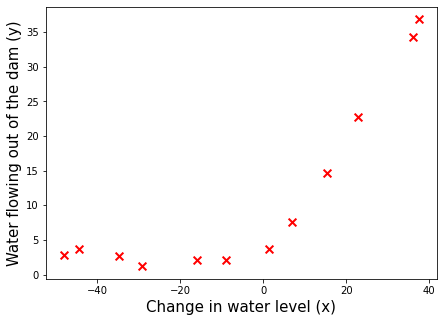

In [8]:
# Plot training data
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c='r', marker='x', s=60, lw=2)
plt.xlabel('Change in water level (x)', fontsize=15)
plt.ylabel('Water flowing out of the dam (y)', fontsize=15)
plt.show()

### Regularized linear regression cost function
![reg-cost-funct.png](./img/reg-cost-funct.png)

In [9]:
# =========== Part 2: Regularized Linear Regression Cost =============
def linearRegCostFunction(X, y, theta, λ):
    '''
    LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear 
        regression with multiple variables
        [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, lambda) computes the 
        cost of using theta as the parameter for linear regression to fit the 
        data points in X and y. Returns the cost in J and the gradient in grad
    
        Note that, argument X should already has bias term
    '''
    # Give bias term if X doesn't have one
    if not np.array_equiv(X[:, 0], 1):
        X = np.insert(X, 0, 1, axis=1)
        
    # Number of dataset, m, and number of features, n
    m, n = X.shape
    
    # Hypothesis
    h = X@theta
    
    # Cost function
    J = 1/(2*m) * np.sum((h-y)**2) + λ/(2*m) * np.sum(theta[1:]**2) 

    # Gradient
    grad = 1/m * (X.T @ (h-y))
    grad[1:] = grad[1:] + λ/m* theta[1:]    
    
    return J, grad

In [10]:
# Define theta and convert it to 2D array
theta  = np.array([1, 1])[:, np.newaxis]

In [11]:
J = linearRegCostFunction(X_bias, y, theta, 1)[0]
J

303.9931922202643

In [12]:
print('Cost at theta = [1 ; 1]:', J)
print('this value should be about 303.993192')

Cost at theta = [1 ; 1]: 303.9931922202643
this value should be about 303.993192


### Regularized linear regression gradient
The partial derivative of regularized linear regression's cost for $\theta_j$ is
![reg-grad](./img/reg-grad.png)

In [13]:
# =========== Part 3: Regularized Linear Regression Gradient =============
# Still using theta (1, 1), find gradient
grad = linearRegCostFunction(X_bias, y, theta, 1)[1]
grad

array([[-15.30301567],
       [598.25074417]])

In [14]:
print('Gradient at theta = [1 ; 1]:\n', grad)
print('this value should be about [-15.303016; 598.250744]')

Gradient at theta = [1 ; 1]:
 [[-15.30301567]
 [598.25074417]]
this value should be about [-15.303016; 598.250744]


### Fitting linear regression
One cost function and gradient are computed correctly, 
the trainLinearReg function will use your cost function to train regularized linear regression.
The training function will use `fmincg` to optimize cost function

In [15]:
from scipy import optimize as opt

In [16]:
# =========== Part 4: Train Linear Regression =============
# We learn from previous chapter in python fmincg requires separate cost and gradient function
# and put the value to be optimized (theta) as the first argument
def costFunction(theta, X, y, λ):
    '''
    costFunction(theta, X, y, λ) will return regularized cost function J
    
    The argument X should already has bias term
    '''
    # Number of dataset, m, and number of features, n
    m, n = X.shape
    
    # Hypothesis
    h = X@theta
    
    # Cost function
    J = 1/(2*m) * np.sum((h-y)**2) + λ/(2*m) * np.sum(theta[1:]**2) 
    
    return J

In [17]:
def grad(theta, X, y, λ):
    '''
    grad(theta, X, y, λ) will return gradient theta
    
    The argument X should already has bias term
    '''

    # Number of dataset, m, and number of features, n
    m, n = X.shape
    
    # Hypothesis
    h = X@theta
    
    # Gradient
    grad = 1/m * (X.T @ (h-y))
    grad[1:] = grad[1:] + λ/m* theta[1:]    
    
    return grad

In [18]:
grad(np.array([1, 1])[:, np.newaxis], X_bias, y, 1)

array([[-15.30301567],
       [598.25074417]])

In [19]:
def regGradDescent(theta, X, y, λ):
    # Initialize some useful values
    m = X.shape[0]; # number of training examples

    # You need to return the following variables correctly 
    grad = np.zeros([theta.size,1]);
    
    # Sigmoiddd
    z = X@theta
    g_z = z
    
    # Grad descent
    grad = 1/m * X.T @ (z - y);
    grad[1:] = grad[1:] + (λ/m * theta[1:])
    
    return grad

In [20]:
def trainLinearReg(X, y, λ):
    '''TRAINLINEARREG Trains linear regression given a dataset (X, y) and a
        regularization parameter lambda
        [theta] = TRAINLINEARREG (X, y, lambda) trains linear regression using
        the dataset (X, y) and regularization parameter lambda. Returns the
        trained parameters theta.
    
        Note that, argument X should already has bias term 
    '''
    # Give bias term if X doesn't have one
    if not np.array_equiv(X[:, 0], 1):
        X = np.insert(X, 0, 1, axis=1)
        
    # Initialize Theta
    initial_theta = np.zeros([X.shape[1], 1]) 
    
    # Number of dataset, m, and number of features, n
    m, n = X.shape    
    
    # Optimization
    arg = (X, y.flatten(), λ)
    
    res = opt.fmin_cg(f=costFunction,
                  x0=initial_theta,
                  fprime=grad,
                  args=arg, 
                  maxiter=100) # This max iter is set to 100 to match MATLAB result in plotting polynomial regression
    
    return res

In [21]:
lambd = 0

In [22]:
# Train linear regression with lambda = 0
opt_theta = trainLinearReg(X_bias, y, lambd)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


In [23]:
opt_theta

array([13.08790351,  0.36777923])

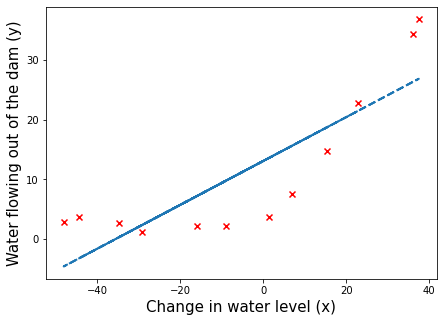

In [24]:
# Plot fit over the data
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c='r', marker='x', lw=1.5)
plt.plot(X, X_bias@opt_theta, '--', lw=2)
plt.xlabel('Change in water level (x)', fontsize=15)
plt.ylabel('Water flowing out of the dam (y)' , fontsize=15)
plt.show()

## Bias-variance
An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data

### Learning curves
Learning curves will be useful in debugging learning algorithms. Learning curve plots training and cross validation error as a function of training set size. 

Recall that training error for dataset is defined as:
![train-error](./img/train-error.png)

In [25]:
# =========== Part 5: Learning Curve for Linear Regression =============
def learningCurve(X, y, Xval, yval, λ):
    '''
    LEARNINGCURVE Generates the train and cross validation set errors needed 
    to plot a learning curve
        [error_train, error_val] = LEARNINGCURVE(X, y, Xval, yval, lambda) returns the train and
        cross validation set errors for a learning curve. In particular, 
        it returns two vectors of the same length - error_train and error_val.
        Then, error_train(i) contains the training error for i examples (and similarly for error_val(i)).
        
    Note that, argument X and Xval should already has bias term 
    '''
    # Number of dataset, m, and number of features, n
    m, n = X.shape    
    
    error_train = np.zeros([m, 1])
    error_val = np.zeros([m, 1])

    for i in range(1, m+1):
        theta_train = trainLinearReg(X[:i], y[:i], λ)[:, np.newaxis]
    
        error_train[i-1] = linearRegCostFunction(X[:i], y[:i], theta_train, 0)[0]
        error_val[i-1] = linearRegCostFunction(Xval, yval, theta_train, 0)[0]
    
    return error_train, error_val

In [26]:
# Add bias term to Xval
Xval_bias = np.insert(Xval, 0, 1, axis=1)

In [27]:
error_train, error_val = learningCurve(X_bias, y, Xval_bias, yval, 0)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

In [28]:
print('Training Examples\t Train Error\t Cross Validation Error')
for i in range(m):
    print('%d \t\t\t %f \t %f' %(i, error_train[i, 0], error_val[i, 0]))

Training Examples	 Train Error	 Cross Validation Error
0 			 0.000000 	 205.121096
1 			 0.000000 	 110.300366
2 			 3.286595 	 45.010232
3 			 2.842678 	 48.368911
4 			 13.154049 	 35.865141
5 			 19.443963 	 33.829957
6 			 20.098522 	 31.970987
7 			 18.172859 	 30.862446
8 			 22.609405 	 31.135998
9 			 23.261462 	 28.936207
10 			 24.317250 	 29.551432
11 			 22.373906 	 29.433818


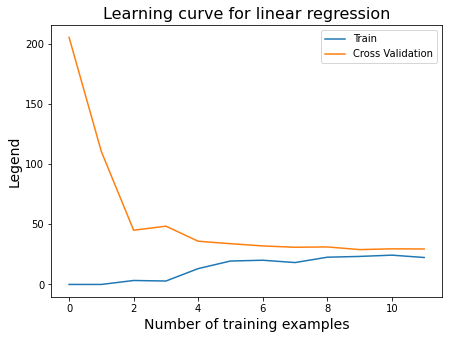

In [29]:
# Plotting learning curve
num_train = np.arange(0, 12)
errors = [error_train, error_val]
labels = ['Train', 'Cross Validation']

plt.figure(figsize=(7, 5))
for err_val, label in zip(errors, labels):
    plt.plot(num_train, err_val, label=label)

plt.title('Learning curve for linear regression', fontsize=16)    
plt.xlabel('Number of training examples', fontsize=14)
plt.ylabel('Legend', fontsize=14)
plt.legend()
plt.show()

## Polynomial regression 
The problem with this linear model was that it was too simple for the data and resulted in underfitting (high bias).  
This part of exercise will add more features to the dataset

In [30]:
# =========== Part 6: Feature Mapping for Polynomial Regression =============
def polyFeatures(X, p):
    '''
    POLYFEATURES Maps X (1D vector) into the p-th power
       [X_poly] = POLYFEATURES(X, p) takes a data matrix X (size m x 1) and
       maps each example into its polynomial features where
       X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p];
    
    This time argument X should NOT contain bias term
    '''
    
    # You need to return the following variables correctly.
    X_poly = np.zeros([X.shape[0], p]);
    
    for i in range(p):
        X_poly[:, [i]] = X**(i+1)
        
    return X_poly

In [31]:
def featureNormalize(X):   
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    
    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm/sigma
    
    return X_norm, mu, sigma

In [32]:
# Set the polynomial value
p = 8

In [33]:
# Map X into polynomial features and normalize it
X_poly = polyFeatures(X, p)

In [34]:
X_poly, mu, sigma = featureNormalize(X_poly)

In [35]:
# Add bias term to X_poly
X_poly = np.insert(X_poly, 0, 1, axis=1)

In [36]:
# Polynomialized features, normalized
dframe(X_poly)

,0,1,2,3,4,5,6,7,8
0,1.0,-0.362141,-0.755087,0.182226,-0.706190,0.306618,-0.590878,0.344516,-0.508481
1,1.0,-0.803205,0.001258,-0.247937,-0.327023,0.093396,-0.435818,0.255416,-0.448912
2,1.0,1.377467,0.584827,1.249769,0.245312,0.978360,-0.012156,0.756568,-0.170352
3,1.0,1.420940,0.706647,1.359846,0.395534,1.106162,0.125637,0.871929,-0.059638
4,1.0,-1.434149,1.854000,-2.037163,2.331431,-2.411536,2.602212,-2.645675,2.766085
5,1.0,-0.128687,-0.975969,0.251385,-0.739687,0.316953,-0.594997,0.345812,-0.508955
6,1.0,0.680582,-0.780029,0.340656,-0.711721,0.326509,-0.591790,0.346830,-0.508613
7,1.0,-0.988534,0.451358,-0.601282,0.092917,-0.218473,-0.141608,0.039403,-0.266693
8,1.0,0.216076,-1.074993,0.266275,-0.743369,0.317561,-0.595129,0.345835,-0.508960
9,1.0,-1.311501,1.422806,-1.548121,1.493396,-1.515908,1.388655,-1.368307,1.224144


In [37]:
Xtest.shape

(21, 1)

In [38]:
# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test/sigma
X_poly_test = np.insert(X_poly_test, 0, 1, axis=1)

In [39]:
# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val/sigma
X_poly_val = np.insert(X_poly_val, 0, 1, axis=1)

In [40]:
dframe(X_poly_val)

,0,1,2,3,4,5,6,7,8
0,1.0,-0.389165,-0.721495,0.168761,-0.698037,0.303540,-0.589405,0.343969,-0.508248
1,1.0,-0.316777,-0.807731,0.201937,-0.717342,0.310554,-0.592639,0.345128,-0.508725
2,1.0,1.321608,0.434621,1.119514,0.074706,0.839044,-0.156342,0.640684,-0.277129
3,1.0,-1.399149,1.727454,-1.889635,2.071693,-2.126476,2.205758,-2.217555,2.236148
4,1.0,1.403684,0.657776,1.315219,0.333994,1.053262,0.068014,0.823194,-0.106884
5,1.0,-1.188099,1.023564,-1.131387,0.836091,-0.869256,0.582007,-0.586563,0.355214
6,1.0,0.020471,-1.052059,0.264364,-0.743141,0.317542,-0.595127,0.345835,-0.508960
7,1.0,1.055221,-0.183872,0.653867,-0.457670,0.457564,-0.504571,0.392614,-0.480685
8,1.0,-1.258569,1.247304,-1.360480,1.190402,-1.210900,0.999543,-0.982843,0.786410
9,1.0,1.016524,-0.260265,0.605234,-0.504432,0.429533,-0.525867,0.380050,-0.489183


In [41]:
print('Normalized Training Example 1: \n', X_poly[0][:, np.newaxis])

Normalized Training Example 1: 
 [[ 1.        ]
 [-0.36214078]
 [-0.75508669]
 [ 0.18222588]
 [-0.70618991]
 [ 0.30661792]
 [-0.59087767]
 [ 0.3445158 ]
 [-0.50848117]]


### Learning Polynomial Regression

In [42]:
# =========== Part 7: Learning Curve for Polynomial Regression =============
# Now, we get to experiment polynomial regression with multiple values of lambda. The default presented below is
# lambda = 0. Try running the code with different values of lambda to see how the fit and learning curve change.
lambd = 0;
theta = trainLinearReg(X_poly, y, lambd);

         Current function value: 0.184737
         Iterations: 100
         Function evaluations: 189
         Gradient evaluations: 189


In [43]:
# This output of theta is slightly different from MATLAB 
# and is caused by the computation accuracy performed by each platform
theta

array([ 11.20532537,  11.64463264,  13.1238112 ,   9.51465344,
        -6.91637731, -10.13639291,   2.67018185,  -0.706573  ,
        -5.0134201 ])

In [44]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x-15, max_x+25, 0.05)
    
    # Transform into m x 1
    x = x[:, np.newaxis]
    
    # Map the x values 
    x_poly = polyFeatures(x, p)
    x_poly = x_poly- mu
    x_poly = x_poly/ sigma
    
    # Add ones
    x_poly = np.insert(x_poly, 0, 1, axis=1)
    
    # Plot
    plt.plot(x, x_poly @ theta, '--', lw=2)

In [45]:
mu, sigma

(array([-5.08542635e+00,  8.48904834e+02, -1.28290173e+04,  1.28967789e+06,
        -2.98314592e+07,  2.29330301e+09, -6.84527284e+10,  4.42233759e+12]),
 array([2.99644020e+01, 7.87889103e+02, 4.81896178e+04, 1.73490431e+06,
        9.39392040e+07, 3.85345373e+09, 1.97934705e+11, 8.68896800e+12]))

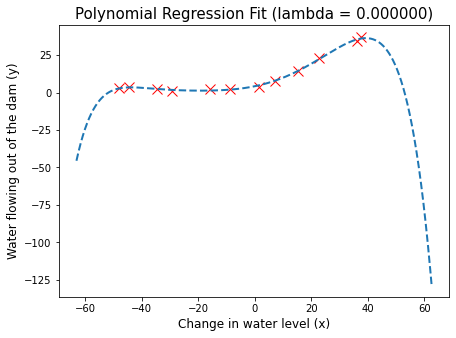

In [46]:
# 1st Figure
# Plot training data and fit
plt.figure(figsize=(7, 5))
plt.plot(X, y, 'rx', markersize=10, lw=1.5)
plotFit(min(X), max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)', fontsize=12)
plt.ylabel('Water flowing out of the dam (y)', fontsize=12)
plt.title('Polynomial Regression Fit (lambda = %f)' %lambd, fontsize=15)
plt.show()

In [47]:
# 2nd Figure
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, 0)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.000000
         Iterations: 100
         Function evaluations: 174
         Gradient evaluations: 174
         Current function value: 0.000001
         Iterations: 100
         Function evaluations: 184
         Gradient evaluations: 184
         Current function value: 0.000002
   

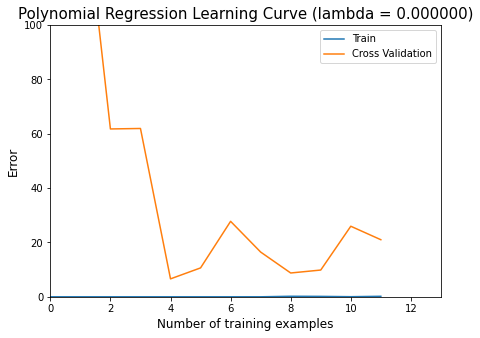

In [48]:
# The resulting figure may differ from MATLAB result,
# this is due to precision accuracy of scipy.optimize.fmin_cg
plt.figure(figsize=(7, 5))

num_train = range(m)
errors = [error_train, error_val]
labels = ['Train', 'Cross Validation']

for err_val, label in zip(errors, labels):
    plt.plot(num_train, err_val, label=label)


plt.xlabel('Number of training examples', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Polynomial Regression Learning Curve (lambda = %f)' %lambd, fontsize=15)
plt.xlim([0, 13])
plt.ylim([0, 100])
plt.legend()
plt.show()

In [49]:
print('Polynomial Regression (lambda = %.3f) \n' %lambd)
print('Training Examples\t Train Error\t Cross Validation Error')
for i in range(m):
    print('%d \t\t\t %f \t %f' %(i, error_train[i, 0], error_val[i, 0]))

Polynomial Regression (lambda = 0.000) 

Training Examples	 Train Error	 Cross Validation Error
0 			 0.000000 	 160.721900
1 			 0.000000 	 160.121510
2 			 0.000000 	 61.755005
3 			 0.000000 	 61.928895
4 			 0.000000 	 6.600266
5 			 0.000001 	 10.632695
6 			 0.000002 	 27.766772
7 			 0.003173 	 16.460591
8 			 0.194752 	 8.760152
9 			 0.153588 	 9.844980
10 			 0.038375 	 25.958924
11 			 0.184737 	 21.004481


### Selecting λ using a cross validation set
You will now implement validationCurve to test various values of lambda on a validation set, then use this to select the "best" lambda value.

In [50]:
def validationCurve(X, y, Xval, yval):
    #  Selected values of lambda (you should not change this)
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    
    # Initialize variable for error
    error_train = np.zeros([len(lambda_vec), 1])
    error_val = np.zeros([len(lambda_vec), 1])
    
    for i in range(len(lambda_vec)):
        lambd = lambda_vec[i]
        theta = trainLinearReg(X, y, lambd)[:, np.newaxis]

        error_train[i] = linearRegCostFunction(X, y, theta, 0)[0]
        error_val[i] = linearRegCostFunction(Xval, yval, theta, 0)[0]
        
    return lambda_vec, error_train, error_val

In [51]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

         Current function value: 0.184737
         Iterations: 100
         Function evaluations: 189
         Gradient evaluations: 189
         Current function value: 0.189239
         Iterations: 100
         Function evaluations: 193
         Gradient evaluations: 193
         Current function value: 0.250683
         Iterations: 100
         Function evaluations: 190
         Gradient evaluations: 190
Optimization terminated successfully.
         Current function value: 0.385063
         Iterations: 99
         Function evaluations: 190
         Gradient evaluations: 190
         Current function value: 0.669275
         Iterations: 100
         Function evaluations: 186
         Gradient evaluations: 186
Optimization terminated successfully.
         Current function value: 1.443470
         Iterations: 59
         Function evaluations: 114
         Gradient evaluations: 114
Optimization terminated successfully.
         Current function value: 3.101591
         Iterations: 43


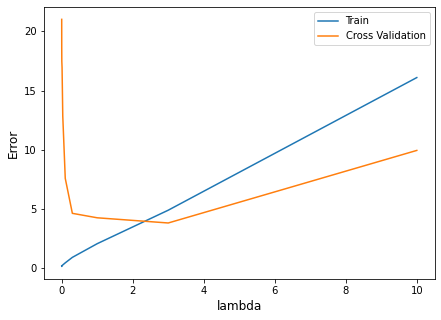

In [52]:
plt.figure(figsize=(7, 5))
plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend(('Train', 'Cross Validation'))
plt.xlabel('lambda', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.show()

In [53]:
print('Lambda\t\t Train Error\t Cross Validation Error')
for i in range(len(lambda_vec)):
    print('%.3f \t\t %f \t %f' %(lambda_vec[i], error_train[i], error_val[i]))

Lambda		 Train Error	 Cross Validation Error
0.000 		 0.184737 	 21.004481
0.001 		 0.155490 	 18.619790
0.003 		 0.178940 	 17.456723
0.010 		 0.221491 	 16.941881
0.030 		 0.281872 	 12.840309
0.100 		 0.459319 	 7.587072
0.300 		 0.921756 	 4.636835
1.000 		 2.076188 	 4.260631
3.000 		 4.901348 	 3.822899
10.000 		 16.092210 	 9.945504
